<a href="https://colab.research.google.com/github/FaustoJuarez/Machine-Learning-Journey/blob/main/DetectarInsectos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

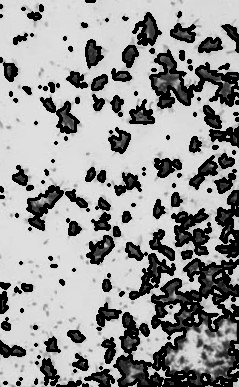

Number of black spots: 204


In [34]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/stickytrap.jpg", cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image with black spots as white
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours of objects in the binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of black spots and draw the contours on the original image
num_spots = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 0.0001:  # filter out small objects
        cv2.drawContours(image, [cnt], 0, (0, 255, 0), 2)
        num_spots += 1

# Display the image with the contours and the number of black spots
cv2_imshow(image)
print('Number of black spots:', num_spots)

# Wait for a key press and then close the window
cv2.waitKey(0)
cv2.destroyAllWindows()






In [ ]:
# Import the necessary packages
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# Define the model architecture
def create_model(input_shape, num_classes):
    # Define the input layer
    inputs = Input(shape=input_shape)

    # Define the Region Proposal Network (RPN)
    rpn_conv1 = Conv2D(512, (3, 3), activation='relu', padding='same', name='rpn_conv1')(inputs)
    rpn_cls = Conv2D(18, (1, 1), activation='sigmoid', name='rpn_cls')(rpn_conv1)
    rpn_reg = Conv2D(36, (1, 1), activation='linear', name='rpn_reg')(rpn_conv1)

    # Define the Fast R-CNN network
    roi_pooling = MaxPooling2D(pool_size=(7, 7))(inputs)
    flatten = Flatten()(roi_pooling)
    fc1 = Dense(4096, activation='relu')(flatten)
    fc2 = Dense(4096, activation='relu')(fc1)
    cls = Dense(num_classes, activation='softmax', name='cls')(fc2)
    reg = Dense(num_classes * 4, activation='linear', name='reg')(fc2)


In [8]:
import cv2
import numpy as np

# Load the image and convert it to grayscale
image = cv2.imread('/content/sticktrap2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to separate the foreground from the background
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# Apply a morphological closing operation to fill in any small holes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Apply image segmentation to separate the foreground into distinct regions
labels = cv2.connectedComponentsWithStats(closed)[1]

# Identify the region that corresponds to the grid
grid_label = None
for label in range(1, labels.max()+1):
    stats = cv2.connectedComponentsWithStats((labels == label).astype(np.uint8))[2]
    x, y, w, h, area = stats[0]
    if area > 10000 and h > 50:
        grid_label = label
        break

# Create a mask that excludes the grid region
mask = np.ones_like(labels, dtype=np.uint8)
mask[labels == grid_label] = 0

# Apply object detection to the masked image
import torch
import torchvision
import cv2
import numpy as np

# Load the pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Set the model to evaluation mode
model.eval()

# Load the image and convert it to the expected format
image = cv2.imread('/content/sticktrap2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image, (2, 0, 1))
image = np.expand_dims(image, axis=0)
image = torch.from_numpy(image).float()

# Run the model on the image
with torch.no_grad():
    output = model(image)

# Count the number of detections
num_insects = 0
for score in output[0]['scores']:
    if score > 0.5:
        num_insects += 1

# Print the number of insects detected
print(f"Number of insects detected: {num_insects}")



Number of insects detected: 1
